"Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands."

🔹 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

🔹 Step 2: Load the Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Aishwarya\\Downloads\\twitter_training.csv.zip")

🔹 Step 3: Rename Columns

In [3]:
df.columns = ['id', 'entity', 'sentiment', 'content']

🔹 Step 4: Check for Null Values

In [4]:
df.isnull().sum()
df.dropna(subset=['content'], inplace=True)

🔹 Step 5: Explore Sentiment Distribution

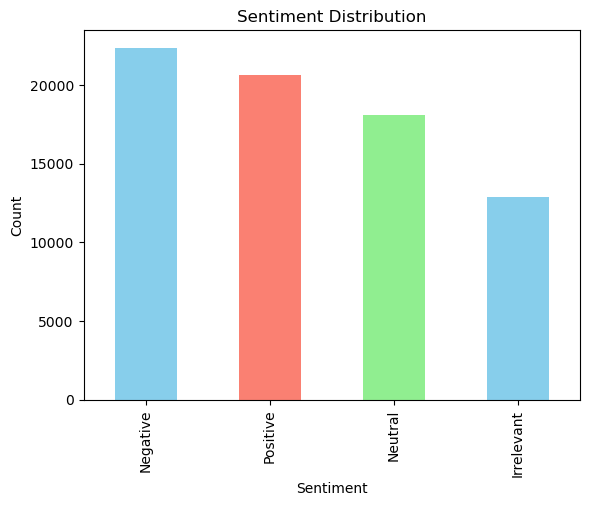

In [5]:
df['sentiment'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

🔹 Step 6: Clean the Text Data

In [6]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r"http\S+", "", text)
        text = re.sub(r"@\w+", "", text)
        text = re.sub(r"#\w+", "", text)
        text = re.sub(r'[^\w\s]', '', text)
        return text.lower()
    return ""

df['clean_text'] = df['content'].apply(clean_text)

🔹 Step 7: Word Count by Sentiment (Bar Plot)

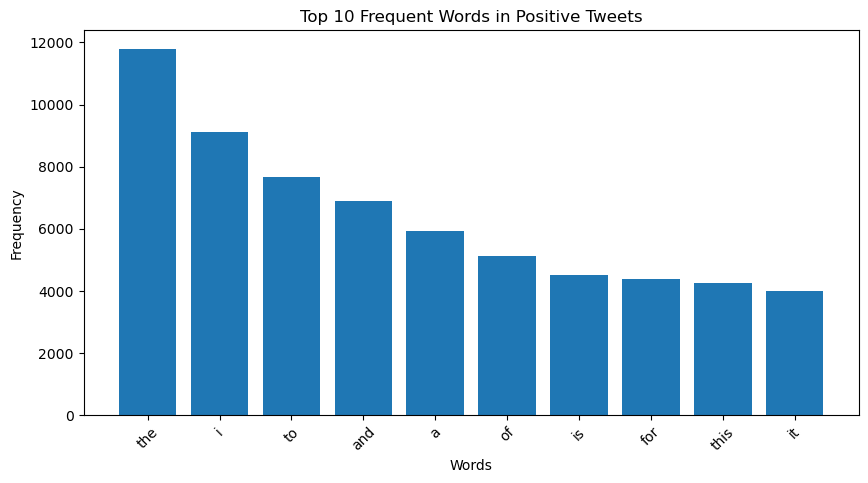

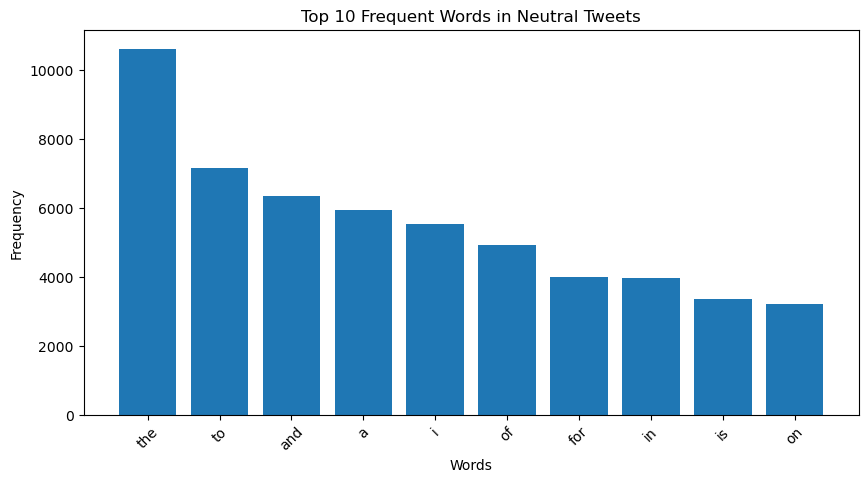

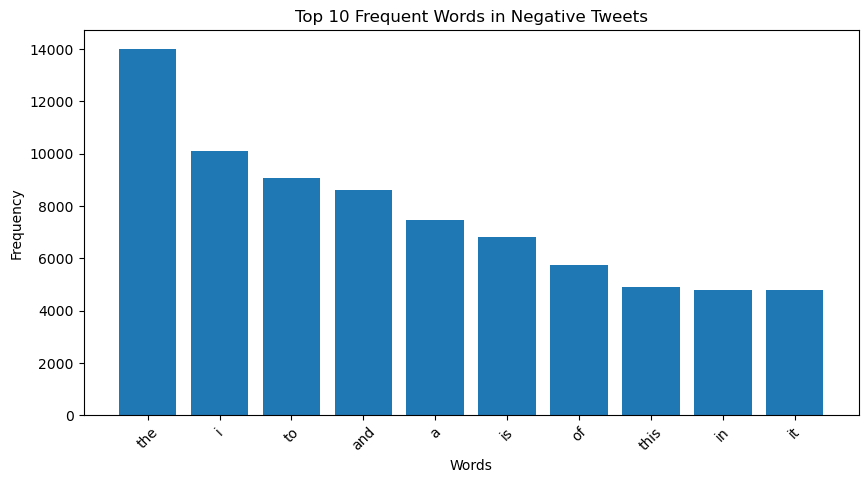

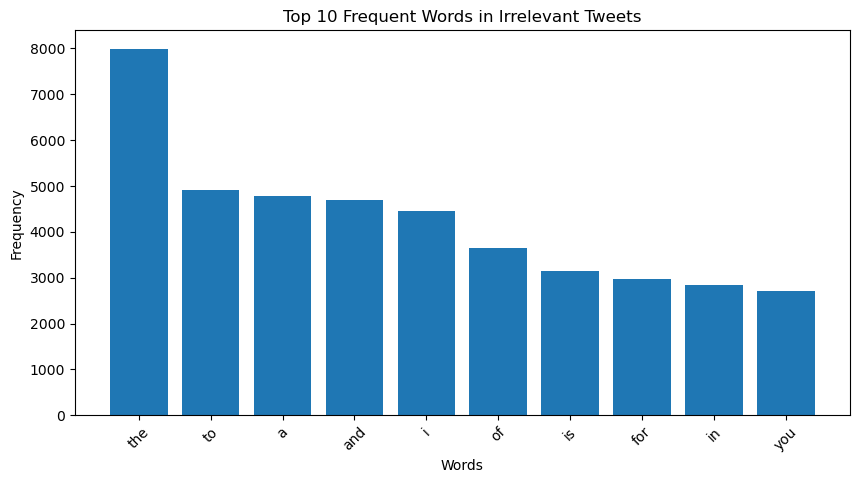

In [7]:
from collections import Counter

def get_word_frequencies(text):
    words = re.findall(r'\w+', text.lower())
    return Counter(words)

for sentiment in df['sentiment'].unique():
    text = " ".join(df[df['sentiment'] == sentiment]['clean_text'])
    word_frequencies = get_word_frequencies(text)
    common_words = word_frequencies.most_common(10)
    words, counts = zip(*common_words)
    
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(f"Top 10 Frequent Words in {sentiment} Tweets")
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

🔹 Step 8:Basic Modeling with Naive Bayes

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

  Irrelevant       0.80      0.57      0.67      2624
    Negative       0.69      0.85      0.76      4463
     Neutral       0.82      0.60      0.69      3589
    Positive       0.70      0.81      0.75      4123

    accuracy                           0.73     14799
   macro avg       0.75      0.71      0.72     14799
weighted avg       0.74      0.73      0.73     14799



✅ Conclusion:
In this task, we analyzed Twitter data to understand public sentiment. After cleaning and exploring the dataset, we visualized sentiment distribution and frequent words for each category. We then built a basic sentiment classifier using Naive Bayes, which showed decent performance. This project demonstrates how sentiment analysis can help uncover public opinion on social media effectively.